In [1]:
'''
Name : Peter Sunny Shanthveer Markappa
Student Number: R00208303
Assignemnt : 01
Subject: Deep Learning
Submission Date: 03- April - 2022
'''

'\nName : Peter Sunny Shanthveer Markappa\nStudent Number: R00208303\nAssignemnt : 01\nSubject: Deep Learning\nSubmission Date: 03- April - 2022\n'

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
from keras.utils import np_utils
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn import datasets
from sklearn import preprocessing
import tensorflow as tf

from numpy import exp
import numpy as np

from sklearn.metrics import accuracy_score

In [ ]:
def softmax(vector):
    e = tf.exp(vector, name='exp')
    return e / tf.math.reduce_sum(e, keepdims=1, name=None, axis=0)

In [ ]:
def forward_pass(x, w1, b1, w2, b2):
    # We need to mutliply each training example by the weights and add bias
    y_pred = tf.matmul(x, tf.transpose(w1)) + b1

    relu_res = tf.keras.activations.relu(y_pred)

    y_pred1 = tf.matmul(relu_res,tf.transpose(w2)) + b2
    # print("Y_pred_1 before entering softmax", y_pred1.shape)
    act = softmax(y_pred1)
    
    return act

In [ ]:
def calculate_accuracy(y_pred, tr_y):
    # Round the predictions by the logistical unit to either 1 or 0
    # predictions = tf.round(y_pred)

    # print("accuraty tr_y",tr_y.shape )
    # print("before y_pred",y_pred.shape )

    predictions_y_pred = tf.argmax(y_pred, axis=0)
    # print("predictions_y_pred", predictions_y_pred)
    
    predictions_tr_y = tf.argmax(tr_y, axis=0)
    # print("predictions_tr_y", predictions_tr_y)

    predictions_correct = tf.cast(tf.equal(tf.transpose(predictions_y_pred), predictions_tr_y), tf.dtypes.float64)
    
    # # Finally, we just determine the mean value of predictions_correct
    accuracy = tf.reduce_mean(predictions_correct)
    
    return accuracy

In [ ]:
def cross_entropy(tr_y, y_pred):
    return (-1/tr_y.shape[0]) * (tf.math.reduce_sum(tr_y * tf.math.log(y_pred) + (1 - tr_y) * (tf.math.log(1 - y_pred))))


In [ ]:
def main():
    
    fashion_mnist = tf.keras.datasets.fashion_mnist

    # load the training and test data    
    (tr_x, tr_y), (te_x, te_y) = fashion_mnist.load_data()

    # reshape the feature data
    tr_x = tr_x.reshape(tr_x.shape[0], 784)
    te_x = te_x.reshape(te_x.shape[0], 784)

    # noramlise feature data
    tr_x = tr_x / 255.0
    te_x = te_x / 255.0

    # one hot encode the training labels and get the transpose
    tr_y = np_utils.to_categorical(tr_y, 10)
    tr_y = tr_y.T

    # one hot encode the test labels and get the transpose
    te_y = np_utils.to_categorical(te_y, 10)
    te_y = te_y.T
    
    
    # array is used to store change in cost function for each iteration of GD
    trainingLoss= []
    validationLoss= []
    trainingAccuracies = []
    validationAccuracies = []


    learning_rate = 0.01
    num_Iterations = 500
    
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    # cross__entropy = tf.keras.losses.categorical_crossentropy()
    
    
    #  X_digits, y_digits = loadData()    
    tr_x = tf.convert_to_tensor(tr_x, tf.dtypes.float64)
    te_x = tf.convert_to_tensor(te_x, tf.dtypes.float64)
    tr_y = tf.convert_to_tensor(tr_y, tf.dtypes.float64)
    te_y = tf.convert_to_tensor(te_y, tf.dtypes.float64)
    
    # We need a coefficient for each of the features and a single bias value
    # Notice we create a column vector of weights all initialized to small random values
    w1 = tf.Variable(tf.random.normal( [200, tr_x.shape[1]] , mean=0.0, stddev=0.05,dtype=tf.dtypes.float64))
    b1 = tf.Variable(tf.random.normal([200], dtype=tf.dtypes.float64))    
    
    w2 = tf.Variable(tf.random.normal([10, w1.shape[0]] , mean=0.1, stddev=0.08,dtype=tf.dtypes.float64))
    b2 = tf.Variable(tf.random.normal([10], dtype=tf.dtypes.float64))    
    
    
    # Splitting the Training data into two parts
    # 1) traning 2) Validation

    tr_x_Training = tr_x[ : 48000, :]
    tr_x_Validation = tr_x[ 48000:, :]

    tr_y_Training = tr_y[ : , : 48000]
    tr_y_Validation = tr_y[ : , 48000 :]


    # Iterate our training loop
    for i in range(1000):
        
        # Create an instance of GradientTape to monitor the forward pass
        # and calcualte the gradients for each of the variables m and c
        
        with tf.GradientTape() as tape:

            # Training
            y_pred_training = forward_pass(tr_x_Training, w1, b1, w2, b2)

            # print("before cross entropy tr_y_Training",tr_y_Training.shape )
            # print("before cross entropy y_pred_training",y_pred_training.shape )

            training_Loss = cross_entropy(tf.transpose(tr_y_Training), y_pred_training)
            trainingLoss.append(training_Loss)
        
        gradients = tape.gradient(training_Loss, [w1, b1, w2, b2])

        training_accuracy = calculate_accuracy(tf.transpose(y_pred_training), tr_y_Training)
        trainingAccuracies.append(training_accuracy)
        
        adam_optimizer.apply_gradients(zip(gradients, [w1, b1, w2, b2]))
        

        # # Validation
        y_pred_validation = forward_pass(tr_x_Validation, w1, b1, w2, b2)
        validation_Loss = cross_entropy(tf.transpose(tr_y_Validation), y_pred_validation)
        validation_accuracy = calculate_accuracy(tf.transpose(y_pred_validation), tr_y_Validation)
        validationLoss.append(validation_Loss)    
        validationAccuracies.append(validation_accuracy)

        if i % 50 == 0:
          print ("Iteration ", i, "\n")
          print(": Training Loss = ",training_Loss.numpy(), ": Validation Loss = ",validation_Loss.numpy())
          print( "Training Accuracies: ", training_accuracy.numpy(), "Validation Accuracies: ", validation_accuracy.numpy())
          print ("----------------")



    # Test Data
    y_pred = forward_pass(te_x, w1, b1, w2, b2)
    currentLoss = cross_entropy(tf.transpose(te_y), y_pred)
    test_accuracy = calculate_accuracy(tf.transpose(y_pred), te_y) 
    print ("Test Accuracy : ", test_accuracy)


    plt.plot(trainingLoss, label="Train Loss")        
    plt.plot(validationLoss, label="Val Loss")
    plt.legend()
    plt.show()

    plt.plot(trainingAccuracies, label="Train Acc")
    plt.plot(validationAccuracies, label="Val Acc")
    plt.legend()
    plt.show()


Iteration  0 

: Training Loss =  11.432379043398361 : Validation Loss =  9.45157110865587
Training Accuracies:  0.07908333333333334 Validation Accuracies:  0.12433333333333334
----------------
Iteration  50 

: Training Loss =  9.300383773343098 : Validation Loss =  7.906819300425285
Training Accuracies:  0.784875 Validation Accuracies:  0.7833333333333333
----------------
Iteration  100 

: Training Loss =  9.12405323651351 : Validation Loss =  7.7421058202509965
Training Accuracies:  0.835125 Validation Accuracies:  0.8306666666666667
----------------
Iteration  150 

: Training Loss =  9.040926793915217 : Validation Loss =  7.66904291601952
Training Accuracies:  0.8550833333333333 Validation Accuracies:  0.8491666666666666
----------------
Iteration  200 

: Training Loss =  8.985015902217217 : Validation Loss =  7.621117371818679
Training Accuracies:  0.8665208333333333 Validation Accuracies:  0.86025
----------------
Iteration  250 

: Training Loss =  8.943539295240456 : Validat

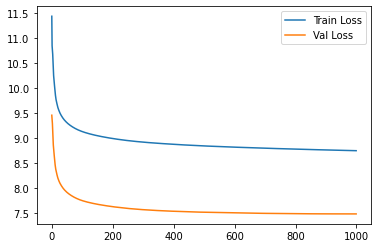

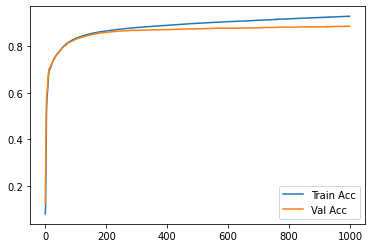

In [ ]:
main()

In [ ]:
# Changing percentage of training and validation data

Iteration  0 

: Training Loss =  10.94256574479815 : Validation Loss =  9.771691789404247
Training Accuracies:  0.12092857142857143 Validation Accuracies:  0.1785
----------------
Iteration  50 

: Training Loss =  9.120967480692777 : Validation Loss =  8.271037145591151
Training Accuracies:  0.8013809523809524 Validation Accuracies:  0.8008888888888889
----------------
Iteration  100 

: Training Loss =  8.965692765269724 : Validation Loss =  8.129602700164662
Training Accuracies:  0.8389285714285715 Validation Accuracies:  0.8352222222222222
----------------
Iteration  150 

: Training Loss =  8.88667393123216 : Validation Loss =  8.059581569579503
Training Accuracies:  0.8578095238095238 Validation Accuracies:  0.8525
----------------
Iteration  200 

: Training Loss =  8.828147031334389 : Validation Loss =  8.009286040383046
Training Accuracies:  0.8700238095238095 Validation Accuracies:  0.8617222222222222
----------------
Iteration  250 

: Training Loss =  8.782419672582664 : V

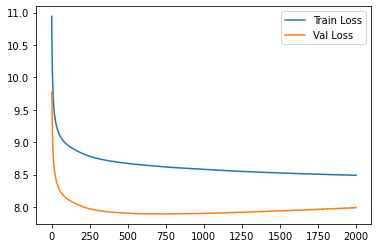

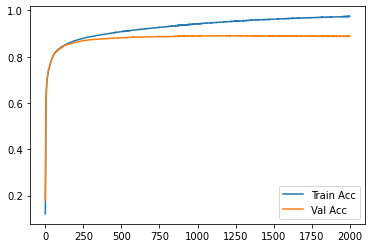

In [ ]:
def main():
    
    fashion_mnist = tf.keras.datasets.fashion_mnist

    # load the training and test data    
    (tr_x, tr_y), (te_x, te_y) = fashion_mnist.load_data()

    # reshape the feature data
    tr_x = tr_x.reshape(tr_x.shape[0], 784)
    te_x = te_x.reshape(te_x.shape[0], 784)

    # noramlise feature data
    tr_x = tr_x / 255.0
    te_x = te_x / 255.0

    # one hot encode the training labels and get the transpose
    tr_y = np_utils.to_categorical(tr_y, 10)
    tr_y = tr_y.T

    # one hot encode the test labels and get the transpose
    te_y = np_utils.to_categorical(te_y, 10)
    te_y = te_y.T
    
    
    # array is used to store change in cost function for each iteration of GD
    trainingLoss= []
    validationLoss= []
    trainingAccuracies = []
    validationAccuracies = []


    learning_rate = 0.01
    num_Iterations = 500
    
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    # cross__entropy = tf.keras.losses.categorical_crossentropy()
    
    
    #  X_digits, y_digits = loadData()    
    tr_x = tf.convert_to_tensor(tr_x, tf.dtypes.float64)
    te_x = tf.convert_to_tensor(te_x, tf.dtypes.float64)
    tr_y = tf.convert_to_tensor(tr_y, tf.dtypes.float64)
    te_y = tf.convert_to_tensor(te_y, tf.dtypes.float64)
    
    # We need a coefficient for each of the features and a single bias value
    # Notice we create a column vector of weights all initialized to small random values
    w1 = tf.Variable(tf.random.normal( [200, tr_x.shape[1]] , mean=0.0, stddev=0.05,dtype=tf.dtypes.float64))
    b1 = tf.Variable(tf.random.normal([200], dtype=tf.dtypes.float64))    
    
    w2 = tf.Variable(tf.random.normal([10, w1.shape[0]] , mean=0.1, stddev=0.08,dtype=tf.dtypes.float64))
    b2 = tf.Variable(tf.random.normal([10], dtype=tf.dtypes.float64))    
    
    
    # Splitting the Training data into two parts
    # 1) traning 2) Validation

    tr_x_Training = tr_x[ : 42000, :]
    tr_x_Validation = tr_x[ 42000:, :]

    tr_y_Training = tr_y[ : , : 42000]
    tr_y_Validation = tr_y[ : , 42000 :]


    # Iterate our training loop
    for i in range(2000):
        
        # Create an instance of GradientTape to monitor the forward pass
        # and calcualte the gradients for each of the variables m and c
        
        with tf.GradientTape() as tape:

            # Training
            y_pred_training = forward_pass(tr_x_Training, w1, b1, w2, b2)

            # print("before cross entropy tr_y_Training",tr_y_Training.shape )
            # print("before cross entropy y_pred_training",y_pred_training.shape )

            training_Loss = cross_entropy(tf.transpose(tr_y_Training), y_pred_training)
            trainingLoss.append(training_Loss)
        
        gradients = tape.gradient(training_Loss, [w1, b1, w2, b2])

        training_accuracy = calculate_accuracy(tf.transpose(y_pred_training), tr_y_Training)
        trainingAccuracies.append(training_accuracy)
        
        adam_optimizer.apply_gradients(zip(gradients, [w1, b1, w2, b2]))
        

        # # Validation
        y_pred_validation = forward_pass(tr_x_Validation, w1, b1, w2, b2)
        validation_Loss = cross_entropy(tf.transpose(tr_y_Validation), y_pred_validation)
        validation_accuracy = calculate_accuracy(tf.transpose(y_pred_validation), tr_y_Validation)
        validationLoss.append(validation_Loss)    
        validationAccuracies.append(validation_accuracy)

        if i % 50 == 0:
          print ("Iteration ", i, "\n")
          print(": Training Loss = ",training_Loss.numpy(), ": Validation Loss = ",validation_Loss.numpy())
          print( "Training Accuracies: ", training_accuracy.numpy(), "Validation Accuracies: ", validation_accuracy.numpy())
          print ("----------------")



    # Test Data
    y_pred = forward_pass(te_x, w1, b1, w2, b2)
    currentLoss = cross_entropy(tf.transpose(te_y), y_pred)
    test_accuracy = calculate_accuracy(tf.transpose(y_pred), te_y) 
    print ("Test Accuracy : ", test_accuracy)


    plt.plot(trainingLoss, label="Train Loss")        
    plt.plot(validationLoss, label="Val Loss")
    plt.legend()
    plt.show()

    plt.plot(trainingAccuracies, label="Train Acc")
    plt.plot(validationAccuracies, label="Val Acc")
    plt.legend()
    plt.show()

main()

In [ ]:
# with 5000 iteration 

Iteration  0 

: Training Loss =  11.421698637437514 : Validation Loss =  9.90338045688788
Training Accuracies:  0.08369047619047619 Validation Accuracies:  0.10177777777777777
----------------
Iteration  50 

: Training Loss =  9.181126175843193 : Validation Loss =  8.32646427507984
Training Accuracies:  0.7794285714285715 Validation Accuracies:  0.7821111111111111
----------------
Iteration  100 

: Training Loss =  9.008774807349377 : Validation Loss =  8.164786910347079
Training Accuracies:  0.827595238095238 Validation Accuracies:  0.8225
----------------
Iteration  150 

: Training Loss =  8.926430947897293 : Validation Loss =  8.090938581675278
Training Accuracies:  0.8462619047619048 Validation Accuracies:  0.8408888888888889
----------------
Iteration  200 

: Training Loss =  8.873748778723288 : Validation Loss =  8.0463096701192
Training Accuracies:  0.8561428571428571 Validation Accuracies:  0.8515
----------------
Iteration  250 

: Training Loss =  8.834468403679695 : Val

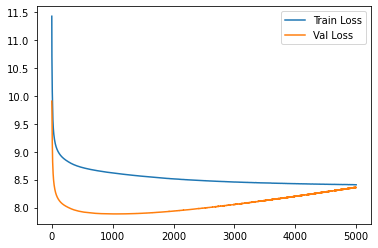

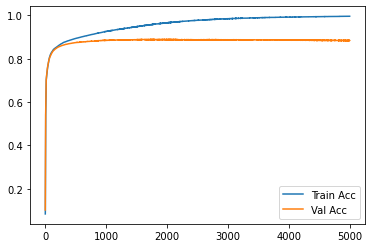

In [ ]:
def main():
    
    fashion_mnist = tf.keras.datasets.fashion_mnist

    # load the training and test data    
    (tr_x, tr_y), (te_x, te_y) = fashion_mnist.load_data()

    # reshape the feature data
    tr_x = tr_x.reshape(tr_x.shape[0], 784)
    te_x = te_x.reshape(te_x.shape[0], 784)

    # noramlise feature data
    tr_x = tr_x / 255.0
    te_x = te_x / 255.0

    # one hot encode the training labels and get the transpose
    tr_y = np_utils.to_categorical(tr_y, 10)
    tr_y = tr_y.T

    # one hot encode the test labels and get the transpose
    te_y = np_utils.to_categorical(te_y, 10)
    te_y = te_y.T
    
    
    # array is used to store change in cost function for each iteration of GD
    trainingLoss= []
    validationLoss= []
    trainingAccuracies = []
    validationAccuracies = []


    learning_rate = 0.01
    num_Iterations = 500
    
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    # cross__entropy = tf.keras.losses.categorical_crossentropy()
    
    
    #  X_digits, y_digits = loadData()    
    tr_x = tf.convert_to_tensor(tr_x, tf.dtypes.float64)
    te_x = tf.convert_to_tensor(te_x, tf.dtypes.float64)
    tr_y = tf.convert_to_tensor(tr_y, tf.dtypes.float64)
    te_y = tf.convert_to_tensor(te_y, tf.dtypes.float64)
    
    # We need a coefficient for each of the features and a single bias value
    # Notice we create a column vector of weights all initialized to small random values
    w1 = tf.Variable(tf.random.normal( [200, tr_x.shape[1]] , mean=0.0, stddev=0.05,dtype=tf.dtypes.float64))
    b1 = tf.Variable(tf.random.normal([200], dtype=tf.dtypes.float64))    
    
    w2 = tf.Variable(tf.random.normal([10, w1.shape[0]] , mean=0.1, stddev=0.08,dtype=tf.dtypes.float64))
    b2 = tf.Variable(tf.random.normal([10], dtype=tf.dtypes.float64))    
    
    
    # Splitting the Training data into two parts
    # 1) traning 2) Validation

    tr_x_Training = tr_x[ : 42000, :]
    tr_x_Validation = tr_x[ 42000:, :]

    tr_y_Training = tr_y[ : , : 42000]
    tr_y_Validation = tr_y[ : , 42000 :]


    # Iterate our training loop
    for i in range(5000):
        
        # Create an instance of GradientTape to monitor the forward pass
        # and calcualte the gradients for each of the variables m and c
        
        with tf.GradientTape() as tape:

            # Training
            y_pred_training = forward_pass(tr_x_Training, w1, b1, w2, b2)

            # print("before cross entropy tr_y_Training",tr_y_Training.shape )
            # print("before cross entropy y_pred_training",y_pred_training.shape )

            training_Loss = cross_entropy(tf.transpose(tr_y_Training), y_pred_training)
            trainingLoss.append(training_Loss)
        
        gradients = tape.gradient(training_Loss, [w1, b1, w2, b2])

        training_accuracy = calculate_accuracy(tf.transpose(y_pred_training), tr_y_Training)
        trainingAccuracies.append(training_accuracy)
        
        adam_optimizer.apply_gradients(zip(gradients, [w1, b1, w2, b2]))
        

        # # Validation
        y_pred_validation = forward_pass(tr_x_Validation, w1, b1, w2, b2)
        validation_Loss = cross_entropy(tf.transpose(tr_y_Validation), y_pred_validation)
        validation_accuracy = calculate_accuracy(tf.transpose(y_pred_validation), tr_y_Validation)
        validationLoss.append(validation_Loss)    
        validationAccuracies.append(validation_accuracy)

        if i % 50 == 0:
          print ("Iteration ", i, "\n")
          print(": Training Loss = ",training_Loss.numpy(), ": Validation Loss = ",validation_Loss.numpy())
          print( "Training Accuracies: ", training_accuracy.numpy(), "Validation Accuracies: ", validation_accuracy.numpy())
          print ("----------------")



    # Test Data
    y_pred = forward_pass(te_x, w1, b1, w2, b2)
    currentLoss = cross_entropy(tf.transpose(te_y), y_pred)
    test_accuracy = calculate_accuracy(tf.transpose(y_pred), te_y) 
    print ("Test Accuracy : ", test_accuracy)


    plt.plot(trainingLoss, label="Train Loss")        
    plt.plot(validationLoss, label="Val Loss")
    plt.legend()
    plt.show()

    plt.plot(trainingAccuracies, label="Train Acc")
    plt.plot(validationAccuracies, label="Val Acc")
    plt.legend()
    plt.show()

main()